In [1]:
# Import Library:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the train  dataset:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
# Checking the fast 5 rows data:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
# Number of rows and columns
df.shape

(1000, 40)

In [5]:
# Information about full data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# Checking the missing values:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
# Here statistical properties of dataset:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


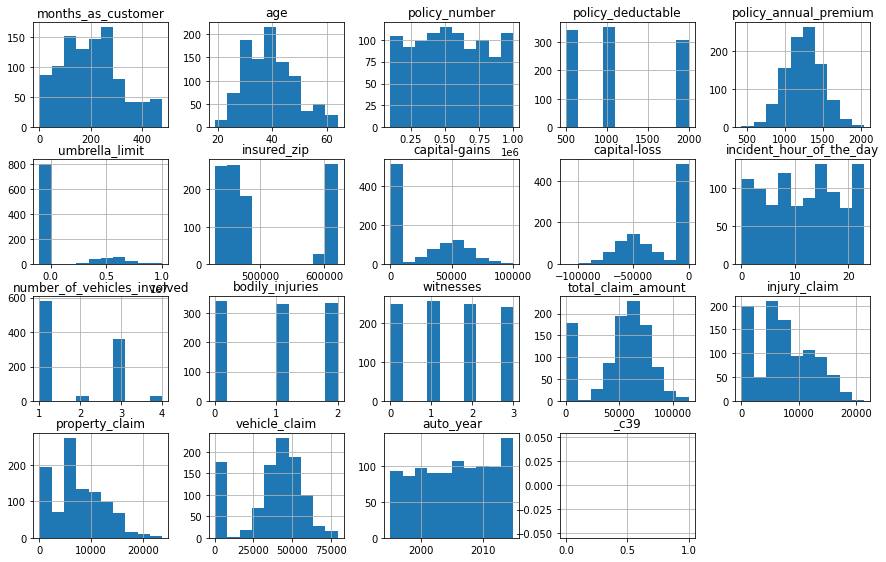

In [8]:
# display histogram:
df.hist(figsize=(15,12), layout=(5,5), sharex=False);

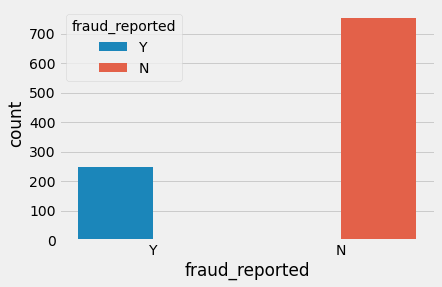

In [9]:
# display countplot for fraud_reported in data:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

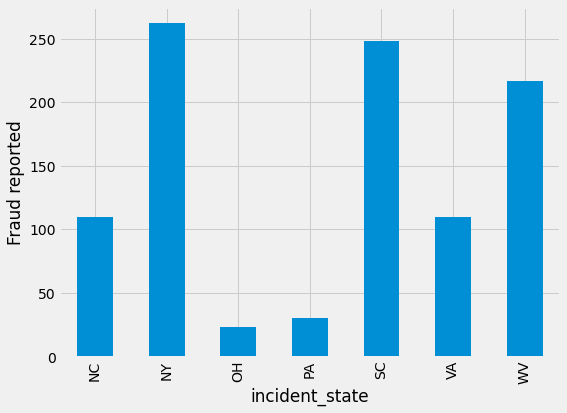

In [10]:
# display for incident_state in data:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

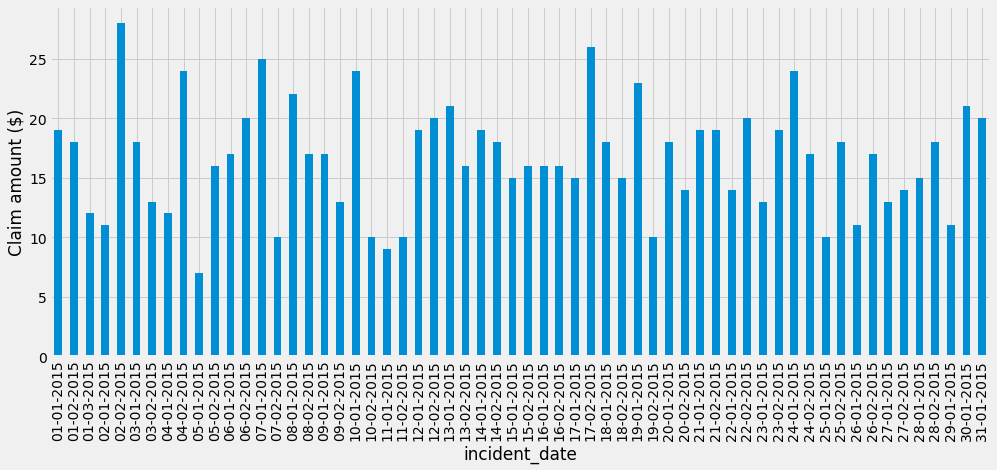

In [11]:
# display for Claim amount ($) in data:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(15,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

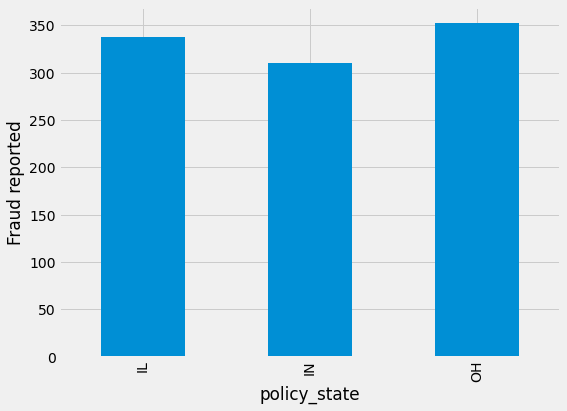

In [12]:
# display for policy_state in data:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

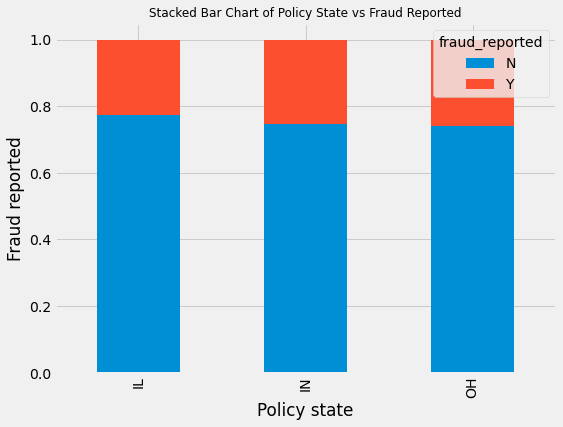

In [13]:
# display for Stacked Bar Chart of Policy State vs Fraud Reported in data:
plt.rcParams['figure.figsize'] = [8, 6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(df.policy_state, df.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy state')
plt.ylabel('Fraud reported')
plt.show()

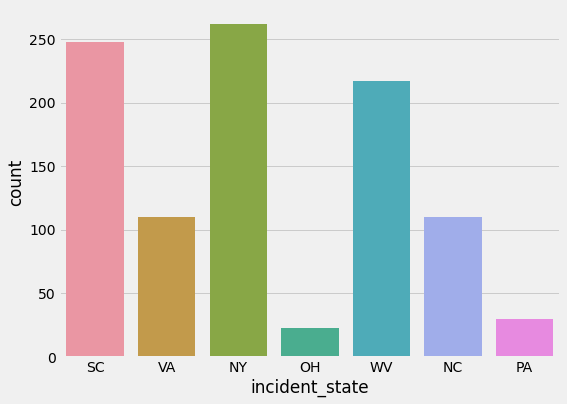

In [14]:
# display for incident_state in data:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x='incident_state', data=df)

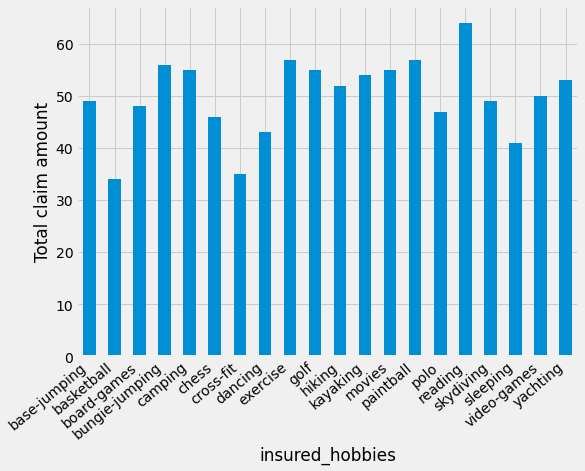

In [15]:
# display for Total claim amount in data:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(8,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

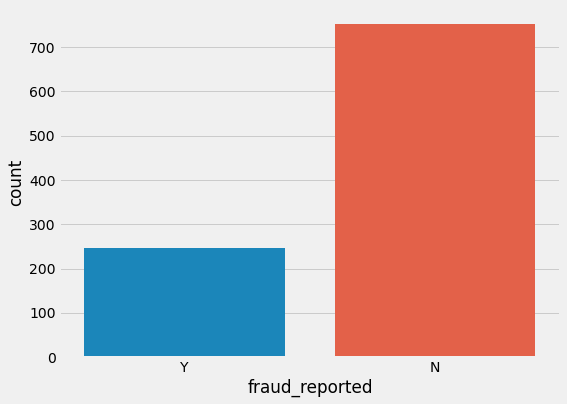

In [16]:
# display for 'fraud_reported't in data:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='fraud_reported',data=df)

#### Data Processing:

In [17]:
# Dropping columns 
df.drop('_c39',axis=1,inplace=True)

In [18]:
# Checking the missing values:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [19]:
# Checking missing values:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [20]:
# Missing values statistics
missing_values = missing_values_table(df)
missing_values

Your selected dataframe has 39 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [21]:
#lets do Lable enconding coding to make more features:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0
for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [22]:
# Correlation of data:
correlation = df.corr()

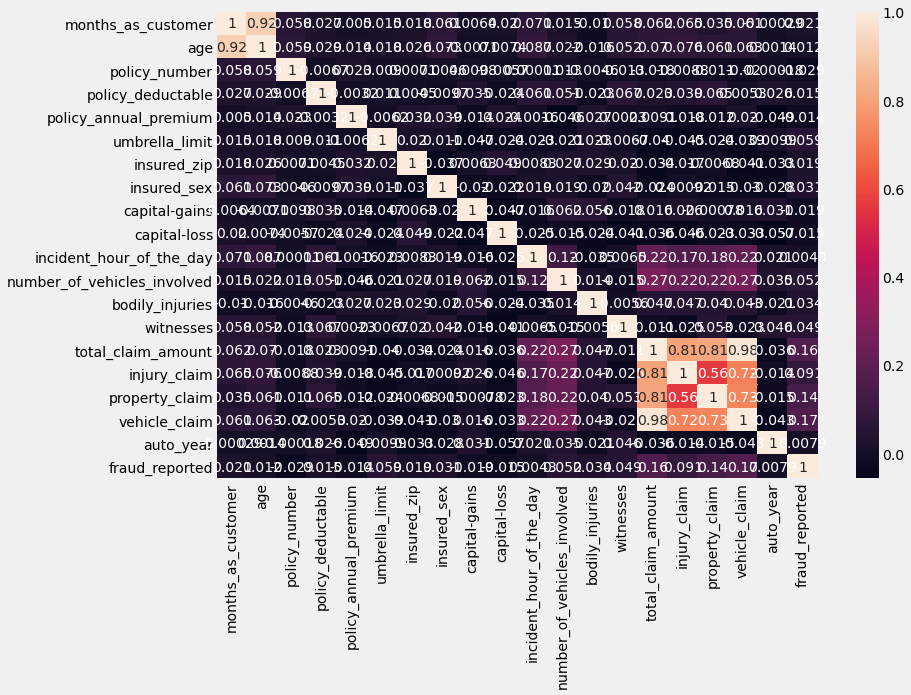

In [23]:
# display heatmap:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

In [24]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
14,incident_location,1000
0,policy_bind_date,951
7,incident_date,60
18,auto_model,39
5,insured_hobbies,20
4,insured_occupation,14
17,auto_make,14
3,insured_education_level,7
12,incident_state,7
13,incident_city,7


In [25]:
# here see name of columns:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [26]:
# droping columns based on above result
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

In [27]:
# Checking the fast 5 rows data:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,466132,1,MD,...,1,2,YES,71610,6510,13020,52080,Saab,2004,1
1,228,42,IN,250/500,2000,1197.22,5000000,468176,1,MD,...,0,0,?,5070,780,780,3510,Mercedes,2007,1
2,134,29,OH,100/300,2000,1413.14,5000000,430632,0,PhD,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,0
3,256,41,IL,250/500,2000,1415.74,6000000,608117,0,PhD,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,1
4,228,44,IL,500/1000,1000,1583.91,6000000,610706,1,Associate,...,0,1,NO,6500,1300,650,4550,Accura,2009,0


In [28]:
df['insured_hobbies']=df['insured_hobbies'].apply(lambda x :'Other' if x!='chess' and x!='cross-fit' else x)

In [29]:
df['insured_hobbies'].unique()

array(['Other', 'chess', 'cross-fit'], dtype=object)

In [30]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 92)


#### split X and y into training and testing sets

In [31]:
y=df['fraud_reported']
X= df.drop('fraud_reported',axis=1)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [33]:
X_train.shape, X_test.shape

((700, 91), (300, 91))

In [34]:
print(X_test)
print(y_train)

     months_as_customer  age  policy_deductable  policy_annual_premium  \
722                 269   41               2000                1422.21   
236                  99   32               1000                1058.21   
82                   78   29               1000                1234.20   
586                 150   30               1000                1677.26   
892                 215   35               1000                1125.40   
..                  ...  ...                ...                    ...   
789                 169   34                500                1469.75   
389                 126   33               1000                1141.71   
991                 257   44               1000                1280.88   
731                 219   43               1000                1114.29   
913                 259   45               2000                1175.07   

     umbrella_limit  insured_zip  insured_sex  capital-gains  capital-loss  \
722               0       620507 

#### Here Creating Model:

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
# prediction details
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
models = {
    "logreg" : LogisticRegression(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(eval_metric='mlogloss')
}

In [37]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    print(f'Training Accuracy: {model.score(X_train, y_train)}')
    print(f'Testing Accuracy: {accuracy_score(y_test, ypred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, ypred)}')
    print('-'*30)

Training Model logreg 
--------------
Training Accuracy: 0.7528571428571429
Testing Accuracy: 0.75
Testing Confusion Matrix: 
[[225   0]
 [ 75   0]]
------------------------------
Training Model DT 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.8066666666666666
Testing Confusion Matrix: 
[[196  29]
 [ 29  46]]
------------------------------
Training Model RF 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.8366666666666667
Testing Confusion Matrix: 
[[209  16]
 [ 33  42]]
------------------------------
Training Model XGB 
--------------
Training Accuracy: 1.0
Testing Accuracy: 0.8633333333333333
Testing Confusion Matrix: 
[[206  19]
 [ 22  53]]
------------------------------


In [38]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
ypred = model.predict(X_test)
model.score(X_train, y_train)

1.0

In [39]:
accuracy_score(y_test, ypred)

0.8233333333333334

#### Model Evaluation:

In [40]:
# Hrer pred confusion_matrix:
confusion_matrix(y_test, ypred)

array([[207,  18],
       [ 35,  40]], dtype=int64)

In [41]:
# DecisionTree the data:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
print('Accuracy',accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 80.33333333333333
[[195  30]
 [ 29  46]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       225
           1       0.61      0.61      0.61        75

    accuracy                           0.80       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.80      0.80      0.80       300



In [42]:
# Creating the hyperparameter grid:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
c_space = np.logspace(-5, 5, 8)
param_grid = {'C': c_space}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
logreg_cv.fit(X,y)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.0002682695795279727}
Best score is 0.752


In [43]:
ypred = model.predict(X_test)

In [44]:
print(ypred)

[0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 1 0]


In [45]:
# Here doing Cross validated:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=5)
scores

array([0.75 , 0.76 , 0.72 , 0.755, 0.755])

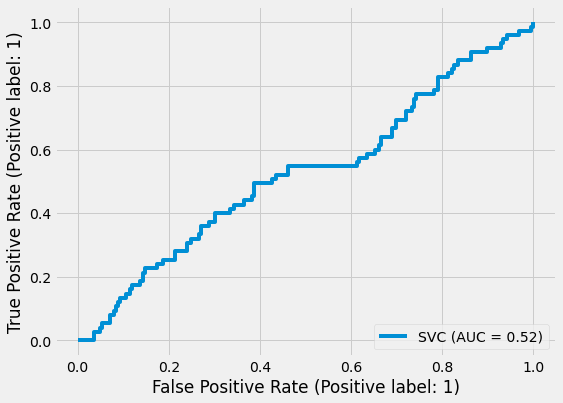

In [46]:
# here ploting roc_curve :
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

In [47]:
# save the model:
import pickle
file = 'Insurance Claims- Fraud Detection'
#save file
save = pickle.dump(model,open(file,'wb'))